In [44]:
import numpy as np
import tensorflow as tf
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Lambda, Flatten, Embedding, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, AvgPool2D
from keras.optimizers import SGD, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

In [60]:
dim= 28
nclasses = 10
epochs = 10
batch_size = 128
((xtrain, ytrain),
 (xval, yval)) = tf.keras.datasets.mnist.load_data()
xtrain = xtrain/np.float32(255)
ytrain = ytrain.astype(np.int32)  # not required
xval = xval/np.float32(255)
yval = yval.astype(np.int32)  
print(xtrain.shape)
print(xval.shape)


(60000, 28, 28)
(10000, 28, 28)


In [61]:
#def df_reshape(df):
   # print("Previous shape, pixels are in 2D vector:", df.shape)
    #df = np.reshape(df,(-1, dim, dim, 1)) 
    # -1 means the dimension doesn't change
   # print("After reshape, pixels are a 28x28x1 3D matrix:", df.shape)
    #return df

In [62]:
#xtrain = df_reshape(xtrain)
#xval = df_reshape(xval)


In [63]:
xtrain = xtrain.reshape(xtrain.shape[0], dim, dim, 1)
xval = xval.reshape(xval.shape[0], dim, dim, 1)
input_shape = (dim, dim, 1)


In [64]:
#convert class vectors to binary class matrices - this is for use in the categorical_crossentropy loss below
y_train = keras.utils.to_categorical(ytrain, nclasses)
y_val = keras.utils.to_categorical(yval, nclasses)
#print (y_train[10000])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 39s 647us/step - loss: 1.0732 - acc: 0.7249 - val_loss: 0.3184 - val_acc: 0.9052
Epoch 2/10
60000/60000 [==============================] - 38s 626us/step - loss: 0.2651 - acc: 0.9214 - val_loss: 0.2036 - val_acc: 0.9366
Epoch 3/10
60000/60000 [==============================] - 38s 631us/step - loss: 0.1852 - acc: 0.9444 - val_loss: 0.1470 - val_acc: 0.9555
Epoch 4/10
60000/60000 [==============================] - 38s 641us/step - loss: 0.1441 - acc: 0.9570 - val_loss: 0.1138 - val_acc: 0.9663
Epoch 5/10
60000/60000 [==============================] - 40s 661us/step - loss: 0.1196 - acc: 0.9647 - val_loss: 0.1043 - val_acc: 0.9686
Epoch 6/10
60000/60000 [==============================] - 40s 660us/step - loss: 0.1030 - acc: 0.9696 - val_loss: 0.0867 - val_acc: 0.9747
Epoch 7/10
60000/60000 [==============================] - 40s 668us/step - loss: 0.0912 - acc: 0.9725 - val_loss: 0.

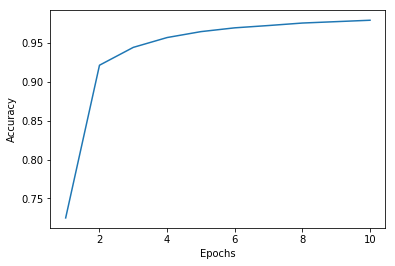

In [66]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=(dim, dim, 1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(nclasses, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=['accuracy'])


class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))

history = AccuracyHistory()

model.fit(xtrain, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(xval, y_val),
          callbacks=[history])
score = model.evaluate(xval, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
plt.plot(range(1, 11), history.acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()